In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset=pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [3]:
dataset

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [4]:
dataset.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [5]:
independent=dataset[['VIN (1-10)','County','City','State','Postal Code','Model Year','Make','Model','Electric Vehicle Type',
                     'Electric Range','Base MSRP','Legislative District','DOL Vehicle ID','Vehicle Location','Electric Utility'
                     ,'2020 Census Tract']]
independent

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [6]:
dependent=dataset[['Clean Alternative Fuel Vehicle (CAFV) Eligibility']]
dependent

,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,Not eligible due to low battery range
1,Not eligible due to low battery range
2,Clean Alternative Fuel Vehicle Eligible
3,Not eligible due to low battery range
4,Clean Alternative Fuel Vehicle Eligible
...,...
181453,Eligibility unknown as battery range has not b...
181454,Not eligible due to low battery range
181455,Eligibility unknown as battery range has not b...
181456,Clean Alternative Fuel Vehicle Eligible


In [7]:
def quanQual(dataset):
    qual=[]
    quan=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtypes=="O"):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [8]:
quan,qual=quanQual(dataset)

In [9]:
quan

['Postal Code',
 'Model Year',
 'Electric Range',
 'Base MSRP',
 'Legislative District',
 'DOL Vehicle ID',
 '2020 Census Tract']

In [10]:
qual

['VIN (1-10)',
 'County',
 'City',
 'State',
 'Make',
 'Model',
 'Electric Vehicle Type',
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
 'Vehicle Location',
 'Electric Utility']

In [11]:
dataset.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 398
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [12]:
df=dataset

In [13]:
#fill values in numerical columns
df['Postal Code'].fillna(df['Postal Code'].median(), inplace=True)
df['Legislative District'].fillna(df['Legislative District'].median(), inplace=True)
df['2020 Census Tract'].fillna(df['2020 Census Tract'].median(), inplace=True)

In [14]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,King,Seattle,WA,98126.0,2017,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,WAUUPBFF2J,Thurston,Olympia,WA,98502.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
2,5YJSA1E22H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),PUGET SOUND ENERGY INC,5.306701e+10
3,1C4JJXP62M,Thurston,Tenino,WA,98589.0,2021,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EC9L,Yakima,Yakima,WA,98902.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,Douglas,East Wenatchee,WA,98802.0,2023,LUCID,AIR,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10
181454,1C4JJXP60N,Spokane,Spokane Valley,WA,99206.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10
181455,5YJ3E1EA0M,King,Enumclaw,WA,98022.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
181456,5YJ3E1EC8L,Clark,Vancouver,WA,98682.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301104e+10


In [15]:
dataset.isnull().sum()

VIN (1-10)                                           0
County                                               3
City                                                 3
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     8
Electric Utility                                     3
2020 Census Tract                                    0
dtype: int64

In [16]:
# Fill missing values in categorical columns with mode
df['County'].fillna(df['County'].mode()[0],inplace=True)
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0],inplace=True)
df['Electric Utility'].fillna(df['Electric Utility'].mode()[0],inplace=True)

In [17]:
dataset.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [18]:
# Encode categorical variables using LabelEncoder
label_encoders={}
for column in['County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Utility']:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])

In [19]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WAUTPBFF4H,79,572,42,98126.0,2017,1,8,1,Not eligible due to low battery range,16,0,34.0,235085336,POINT (-122.374105 47.54468),57,5.303301e+10
1,WAUUPBFF2J,172,448,42,98502.0,2018,1,8,1,Not eligible due to low battery range,16,0,22.0,237896795,POINT (-122.943445 47.059252),73,5.306701e+10
2,5YJSA1E22H,172,305,42,98516.0,2017,34,82,0,Clean Alternative Fuel Vehicle Eligible,210,0,22.0,154498865,POINT (-122.78083 47.083975),73,5.306701e+10
3,1C4JJXP62M,172,638,42,98589.0,2021,17,136,1,Not eligible due to low battery range,25,0,20.0,154525493,POINT (-122.85403 46.856085),73,5.306701e+10
4,5YJ3E1EC9L,189,721,42,98902.0,2020,34,81,0,Clean Alternative Fuel Vehicle Eligible,308,0,14.0,225996361,POINT (-120.524012 46.5973939),65,5.307700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,46,164,42,98802.0,2023,22,12,0,Eligibility unknown as battery range has not b...,0,0,12.0,244207316,POINT (-120.28674 47.4176),68,5.301795e+10
181454,1C4JJXP60N,163,611,42,99206.0,2022,17,136,1,Not eligible due to low battery range,21,0,4.0,207180774,POINT (-117.24549 47.6534),2,5.306301e+10
181455,5YJ3E1EA0M,79,187,42,98022.0,2021,34,81,0,Eligibility unknown as battery range has not b...,0,0,31.0,161934202,POINT (-121.98953 47.20347),74,5.303303e+10
181456,5YJ3E1EC8L,33,671,42,98682.0,2020,34,81,0,Clean Alternative Fuel Vehicle Eligible,308,0,18.0,100859650,POINT (-122.5286031 45.6686601),36,5.301104e+10


dataset=pd.get_dummies(dataset,drop_first=True)
dataset

# Finding Outliers

In [20]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser",
                                    "Greater","Min","Max"],columns=quan)
for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
        descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
        descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Min"]=dataset[columnName].min()
        descriptive[columnName]["Max"]=dataset[columnName].max()

In [21]:
descriptive

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Mean,98174.049857,2020.581793,57.826665,1040.236749,29.115443,221412778.039243,52975755002.622536
Median,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Mode,98052.0,2023,0,0,41.0,4385,53033028200.0
Q1:25%,98052.0,2019.0,0.0,0.0,18.0,183068666.75,53033009702.0
Q2:50%,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Q3:75%,98370.0,2023.0,75.0,0.0,42.0,256131982.25,53053073005.0
99%,99338.0,2024.0,322.0,54950.0,49.0,476827500.02,53073010506.0
Q4:100%,99577.0,2024.0,337.0,845000.0,49.0,479254772.0,56033000100.0
IQR,318.0,4.0,75.0,0.0,24.0,73063315.5,20063303.0
1.5rule,477.0,6.0,112.5,0.0,36.0,109594973.25,30094954.5


In [22]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)    

In [23]:
descriptive

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Mean,98174.049857,2020.581793,57.826665,1040.236749,29.115443,221412778.039243,52975755002.622536
Median,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Mode,98052.0,2023,0,0,41.0,4385,53033028200.0
Q1:25%,98052.0,2019.0,0.0,0.0,18.0,183068666.75,53033009702.0
Q2:50%,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Q3:75%,98370.0,2023.0,75.0,0.0,42.0,256131982.25,53053073005.0
99%,99338.0,2024.0,322.0,54950.0,49.0,476827500.02,53073010506.0
Q4:100%,99577.0,2024.0,337.0,845000.0,49.0,479254772.0,56033000100.0
IQR,318.0,4.0,75.0,0.0,24.0,73063315.5,20063303.0
1.5rule,477.0,6.0,112.5,0.0,36.0,109594973.25,30094954.5


In [24]:
lesser

['Postal Code', 'Model Year', 'DOL Vehicle ID', '2020 Census Tract']

In [25]:
greater

['Postal Code',
 'Electric Range',
 'Base MSRP',
 'DOL Vehicle ID',
 '2020 Census Tract']

# Replacing Outliers

In [26]:
for columnName in lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]

C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:4: SettingWi

In [27]:
descriptive

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Mean,98174.049857,2020.581793,57.826665,1040.236749,29.115443,221412778.039243,52975755002.622536
Median,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Mode,98052.0,2023,0,0,41.0,4385,53033028200.0
Q1:25%,98052.0,2019.0,0.0,0.0,18.0,183068666.75,53033009702.0
Q2:50%,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Q3:75%,98370.0,2023.0,75.0,0.0,42.0,256131982.25,53053073005.0
99%,99338.0,2024.0,322.0,54950.0,49.0,476827500.02,53073010506.0
Q4:100%,99577.0,2024.0,337.0,845000.0,49.0,479254772.0,56033000100.0
IQR,318.0,4.0,75.0,0.0,24.0,73063315.5,20063303.0
1.5rule,477.0,6.0,112.5,0.0,36.0,109594973.25,30094954.5


In [28]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser",
                                    "Greater","Min","Max"],columns=quan)
for columnName in quan:
        descriptive[columnName]["Mean"]=dataset[columnName].mean()
        descriptive[columnName]["Median"]=dataset[columnName].median()
        descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
        descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
        descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
        descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Min"]=dataset[columnName].min()
        descriptive[columnName]["Max"]=dataset[columnName].max()

In [29]:
descriptive

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Mean,98240.154548,2020.60128,48.392259,0.0,29.115443,219343424.718651,53039738082.389404
Median,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Mode,98847.0,2023,0.0,0,41.0,365726955.5,53033028200.0
Q1:25%,98052.0,2019.0,0.0,0.0,18.0,183068666.75,53033009702.0
Q2:50%,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Q3:75%,98370.0,2023.0,75.0,0.0,42.0,256131982.25,53053073005.0
99%,98847.0,2024.0,187.5,0.0,49.0,365726955.5,53073010506.0
Q4:100%,98847.0,2024.0,187.5,0.0,49.0,365726955.5,53083167959.5
IQR,318.0,4.0,75.0,0.0,24.0,73063315.5,20063303.0
1.5rule,477.0,6.0,112.5,0.0,36.0,109594973.25,30094954.5


In [30]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [31]:
lesser

[]

In [32]:
greater

[]

In [33]:
dataset[quan]

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98126.0,2017,16.0,0,34.0,235085336.0,5.303301e+10
1,98502.0,2018,16.0,0,22.0,237896795.0,5.306701e+10
2,98516.0,2017,187.5,0,22.0,154498865.0,5.306701e+10
3,98589.0,2021,25.0,0,20.0,154525493.0,5.306701e+10
4,98847.0,2020,187.5,0,14.0,225996361.0,5.307700e+10
...,...,...,...,...,...,...,...
181453,98802.0,2023,0.0,0,12.0,244207316.0,5.301795e+10
181454,98847.0,2022,21.0,0,4.0,207180774.0,5.306301e+10
181455,98022.0,2021,0.0,0,31.0,161934202.0,5.303303e+10
181456,98682.0,2020,187.5,0,18.0,100859650.0,5.301104e+10


In [34]:
dataset[qual]

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,WAUTPBFF4H,79,572,42,1,8,1,Not eligible due to low battery range,POINT (-122.374105 47.54468),57
1,WAUUPBFF2J,172,448,42,1,8,1,Not eligible due to low battery range,POINT (-122.943445 47.059252),73
2,5YJSA1E22H,172,305,42,34,82,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.78083 47.083975),73
3,1C4JJXP62M,172,638,42,17,136,1,Not eligible due to low battery range,POINT (-122.85403 46.856085),73
4,5YJ3E1EC9L,189,721,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-120.524012 46.5973939),65
...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,46,164,42,22,12,0,Eligibility unknown as battery range has not b...,POINT (-120.28674 47.4176),68
181454,1C4JJXP60N,163,611,42,17,136,1,Not eligible due to low battery range,POINT (-117.24549 47.6534),2
181455,5YJ3E1EA0M,79,187,42,34,81,0,Eligibility unknown as battery range has not b...,POINT (-121.98953 47.20347),74
181456,5YJ3E1EC8L,33,671,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.5286031 45.6686601),36


# Preprocessed Dataset

In [35]:
ec=dataset[quan]
ec

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98126.0,2017,16.0,0,34.0,235085336.0,5.303301e+10
1,98502.0,2018,16.0,0,22.0,237896795.0,5.306701e+10
2,98516.0,2017,187.5,0,22.0,154498865.0,5.306701e+10
3,98589.0,2021,25.0,0,20.0,154525493.0,5.306701e+10
4,98847.0,2020,187.5,0,14.0,225996361.0,5.307700e+10
...,...,...,...,...,...,...,...
181453,98802.0,2023,0.0,0,12.0,244207316.0,5.301795e+10
181454,98847.0,2022,21.0,0,4.0,207180774.0,5.306301e+10
181455,98022.0,2021,0.0,0,31.0,161934202.0,5.303303e+10
181456,98682.0,2020,187.5,0,18.0,100859650.0,5.301104e+10


In [36]:
ec1=dataset[qual]
ec1

,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,WAUTPBFF4H,79,572,42,1,8,1,Not eligible due to low battery range,POINT (-122.374105 47.54468),57
1,WAUUPBFF2J,172,448,42,1,8,1,Not eligible due to low battery range,POINT (-122.943445 47.059252),73
2,5YJSA1E22H,172,305,42,34,82,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.78083 47.083975),73
3,1C4JJXP62M,172,638,42,17,136,1,Not eligible due to low battery range,POINT (-122.85403 46.856085),73
4,5YJ3E1EC9L,189,721,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-120.524012 46.5973939),65
...,...,...,...,...,...,...,...,...,...,...
181453,50EA1TEA7P,46,164,42,22,12,0,Eligibility unknown as battery range has not b...,POINT (-120.28674 47.4176),68
181454,1C4JJXP60N,163,611,42,17,136,1,Not eligible due to low battery range,POINT (-117.24549 47.6534),2
181455,5YJ3E1EA0M,79,187,42,34,81,0,Eligibility unknown as battery range has not b...,POINT (-121.98953 47.20347),74
181456,5YJ3E1EC8L,33,671,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.5286031 45.6686601),36


In [37]:
frames=[ec,ec1]

In [38]:
Pre_Electricvehicle=pd.concat(frames,axis=1)

In [39]:
Pre_Electricvehicle

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,98126.0,2017,16.0,0,34.0,235085336.0,5.303301e+10,WAUTPBFF4H,79,572,42,1,8,1,Not eligible due to low battery range,POINT (-122.374105 47.54468),57
1,98502.0,2018,16.0,0,22.0,237896795.0,5.306701e+10,WAUUPBFF2J,172,448,42,1,8,1,Not eligible due to low battery range,POINT (-122.943445 47.059252),73
2,98516.0,2017,187.5,0,22.0,154498865.0,5.306701e+10,5YJSA1E22H,172,305,42,34,82,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.78083 47.083975),73
3,98589.0,2021,25.0,0,20.0,154525493.0,5.306701e+10,1C4JJXP62M,172,638,42,17,136,1,Not eligible due to low battery range,POINT (-122.85403 46.856085),73
4,98847.0,2020,187.5,0,14.0,225996361.0,5.307700e+10,5YJ3E1EC9L,189,721,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-120.524012 46.5973939),65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,98802.0,2023,0.0,0,12.0,244207316.0,5.301795e+10,50EA1TEA7P,46,164,42,22,12,0,Eligibility unknown as battery range has not b...,POINT (-120.28674 47.4176),68
181454,98847.0,2022,21.0,0,4.0,207180774.0,5.306301e+10,1C4JJXP60N,163,611,42,17,136,1,Not eligible due to low battery range,POINT (-117.24549 47.6534),2
181455,98022.0,2021,0.0,0,31.0,161934202.0,5.303303e+10,5YJ3E1EA0M,79,187,42,34,81,0,Eligibility unknown as battery range has not b...,POINT (-121.98953 47.20347),74
181456,98682.0,2020,187.5,0,18.0,100859650.0,5.301104e+10,5YJ3E1EC8L,33,671,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.5286031 45.6686601),36


In [40]:
Pre_Electricvehicle.isnull().sum()

Postal Code                                          0
Model Year                                           0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
2020 Census Tract                                    0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Vehicle Location                                     0
Electric Utility                                     0
dtype: int64

In [41]:
Pre_Electricvehicle.to_csv("Pre_Electricvehicle.csv",index=False)

# Frequency

In [42]:
dataset["Electric Range"].value_counts()

0.0      94730
187.5    32557
25.0      4186
32.0      4065
84.0      3894
         ...  
11.0         3
95.0         3
51.0         3
57.0         2
46.0         1
Name: Electric Range, Length: 76, dtype: int64

In [43]:
freqTable=pd.DataFrame(columns=["Unique_Values","Frequency","Relative_Frequency","Cumsum"])

In [44]:
freqTable

,Unique_Values,Frequency,Relative_Frequency,Cumsum


In [45]:
freqTable["Unique_Values"]=dataset["Electric Range"].value_counts().index
freqTable["Frequency"]=dataset["Electric Range"].value_counts().values
freqTable["Relative_Frequency"]=(freqTable["Frequency"]/76)
freqTable["Cumsum"]=freqTable["Relative_Frequency"].cumsum()

In [46]:
freqTable

,Unique_Values,Frequency,Relative_Frequency,Cumsum
0,0.0,94730,1246.447368,1246.447368
1,187.5,32557,428.381579,1674.828947
2,25.0,4186,55.078947,1729.907895
3,32.0,4065,53.486842,1783.394737
4,84.0,3894,51.236842,1834.631579
...,...,...,...,...
71,11.0,3,0.039474,2387.486842
72,95.0,3,0.039474,2387.526316
73,51.0,3,0.039474,2387.565789
74,57.0,2,0.026316,2387.592105


# Skewness & Kurtosis

In [47]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser",
                                    "Greater","Min","Max","Skewness","Kurtosis"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()
    descriptive[columnName]["Skewness"]=dataset[columnName].skew()
    descriptive[columnName]["Kurtosis"]=dataset[columnName].kurtosis()

In [48]:
descriptive

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Mean,98240.154548,2020.60128,48.392259,0.0,29.115443,219343424.718651,53039738082.389404
Median,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Mode,98847.0,2023,0.0,0,41.0,365726955.5,53033028200.0
Q1:25%,98052.0,2019.0,0.0,0.0,18.0,183068666.75,53033009702.0
Q2:50%,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Q3:75%,98370.0,2023.0,75.0,0.0,42.0,256131982.25,53053073005.0
99%,98847.0,2024.0,187.5,0.0,49.0,365726955.5,53073010506.0
Q4:100%,98847.0,2024.0,187.5,0.0,49.0,365726955.5,53083167959.5
IQR,318.0,4.0,75.0,0.0,24.0,73063315.5,20063303.0
1.5rule,477.0,6.0,112.5,0.0,36.0,109594973.25,30094954.5


# Variance and Standard deviation

In [49]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser",
                                    "Greater","Min","Max","Skewness","Kurtosis","Variance","Std"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()
    descriptive[columnName]["Skewness"]=dataset[columnName].skew()
    descriptive[columnName]["Kurtosis"]=dataset[columnName].kurtosis()
    descriptive[columnName]["Variance"]=dataset[columnName].var()
    descriptive[columnName]["Std"]=dataset[columnName].std()        

In [50]:
descriptive

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
Mean,98240.154548,2020.60128,48.392259,0.0,29.115443,219343424.718651,53039738082.389404
Median,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Mode,98847.0,2023,0.0,0,41.0,365726955.5,53033028200.0
Q1:25%,98052.0,2019.0,0.0,0.0,18.0,183068666.75,53033009702.0
Q2:50%,98122.0,2022.0,0.0,0.0,33.0,228915522.0,53033029602.0
Q3:75%,98370.0,2023.0,75.0,0.0,42.0,256131982.25,53053073005.0
99%,98847.0,2024.0,187.5,0.0,49.0,365726955.5,53073010506.0
Q4:100%,98847.0,2024.0,187.5,0.0,49.0,365726955.5,53083167959.5
IQR,318.0,4.0,75.0,0.0,24.0,73063315.5,20063303.0
1.5rule,477.0,6.0,112.5,0.0,36.0,109594973.25,30094954.5


# Read the Preprocessed dataset

In [51]:
dataset=pd.read_csv("Pre_Electricvehicle.csv")

In [52]:
dataset

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,VIN (1-10),County,City,State,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Vehicle Location,Electric Utility
0,98126.0,2017,16.0,0,34.0,235085336.0,5.303301e+10,WAUTPBFF4H,79,572,42,1,8,1,Not eligible due to low battery range,POINT (-122.374105 47.54468),57
1,98502.0,2018,16.0,0,22.0,237896795.0,5.306701e+10,WAUUPBFF2J,172,448,42,1,8,1,Not eligible due to low battery range,POINT (-122.943445 47.059252),73
2,98516.0,2017,187.5,0,22.0,154498865.0,5.306701e+10,5YJSA1E22H,172,305,42,34,82,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.78083 47.083975),73
3,98589.0,2021,25.0,0,20.0,154525493.0,5.306701e+10,1C4JJXP62M,172,638,42,17,136,1,Not eligible due to low battery range,POINT (-122.85403 46.856085),73
4,98847.0,2020,187.5,0,14.0,225996361.0,5.307700e+10,5YJ3E1EC9L,189,721,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-120.524012 46.5973939),65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,98802.0,2023,0.0,0,12.0,244207316.0,5.301795e+10,50EA1TEA7P,46,164,42,22,12,0,Eligibility unknown as battery range has not b...,POINT (-120.28674 47.4176),68
181454,98847.0,2022,21.0,0,4.0,207180774.0,5.306301e+10,1C4JJXP60N,163,611,42,17,136,1,Not eligible due to low battery range,POINT (-117.24549 47.6534),2
181455,98022.0,2021,0.0,0,31.0,161934202.0,5.303303e+10,5YJ3E1EA0M,79,187,42,34,81,0,Eligibility unknown as battery range has not b...,POINT (-121.98953 47.20347),74
181456,98682.0,2020,187.5,0,18.0,100859650.0,5.301104e+10,5YJ3E1EC8L,33,671,42,34,81,0,Clean Alternative Fuel Vehicle Eligible,POINT (-122.5286031 45.6686601),36


In [53]:
dataset.isnull().sum()

Postal Code                                          0
Model Year                                           0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
2020 Census Tract                                    0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Vehicle Location                                     0
Electric Utility                                     0
dtype: int64

# Normal Distribution(PDF & CDF)

In [54]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f'%(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probability for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}:{}".format(startrange,endrange,sum(probabilities)))
    return prob    

C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


Mean=48.392,Standard Deviation=71.379
The area between range(40,100:0.3125786836394203


C:\Anaconda\envs\ai\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda\envs\ai\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda\envs\ai\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


0.3125786836394203

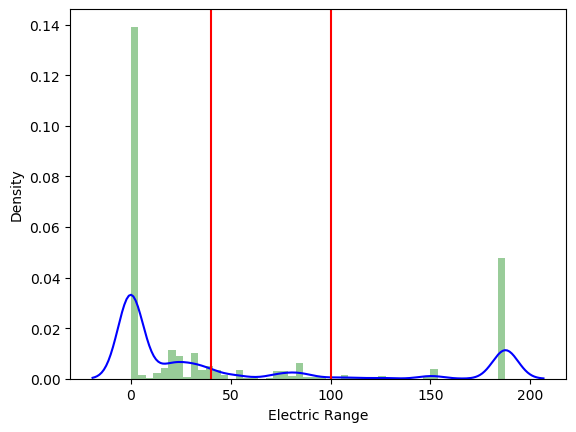

In [55]:
get_pdf_probability(dataset["Electric Range"],40,100)

In [56]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf=ECDF(dataset['Electric Range'])
ecdf(90)

0.786529114175181

# convert normal distribution to std normal distribution

In [57]:
def stdNdist(dataset):
    #to convert std normal distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std)for j in values]
    sns.distplot(z_score,kde=True)
    sum(z_score)/len(z_score)
    #z_score.std()

C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Anaconda\envs\ai\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda\envs\ai\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anacond

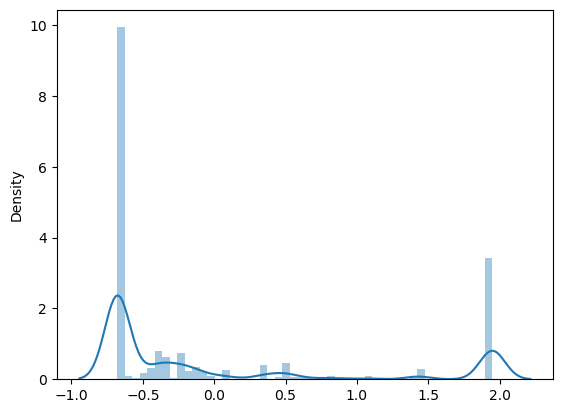

In [58]:
stdNdist(dataset['Electric Range'])

C:\Anaconda\envs\ai\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  
C:\Anaconda\envs\ai\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda\envs\ai\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anacond

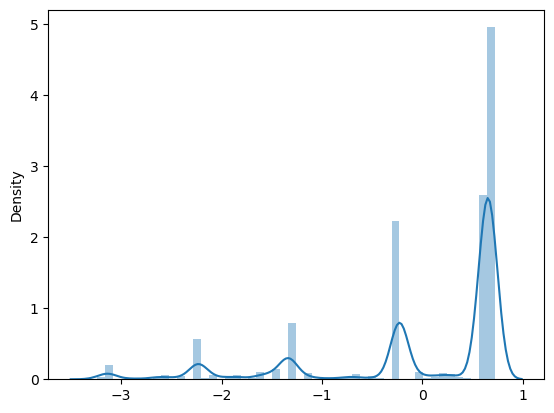

In [59]:
stdNdist(dataset['Electric Utility'])